# Employee Salary Prediction - Model Development

### 1: Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib       

### 2: Load Dataset

In [8]:
df = pd.read_csv('Data/Employee.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 2.1: Visual Exploratory Data Analysis
- Histograms for numeric columns
- Count plots for categorical columns
- Boxplots to spot outliers
- Correlation heatmap

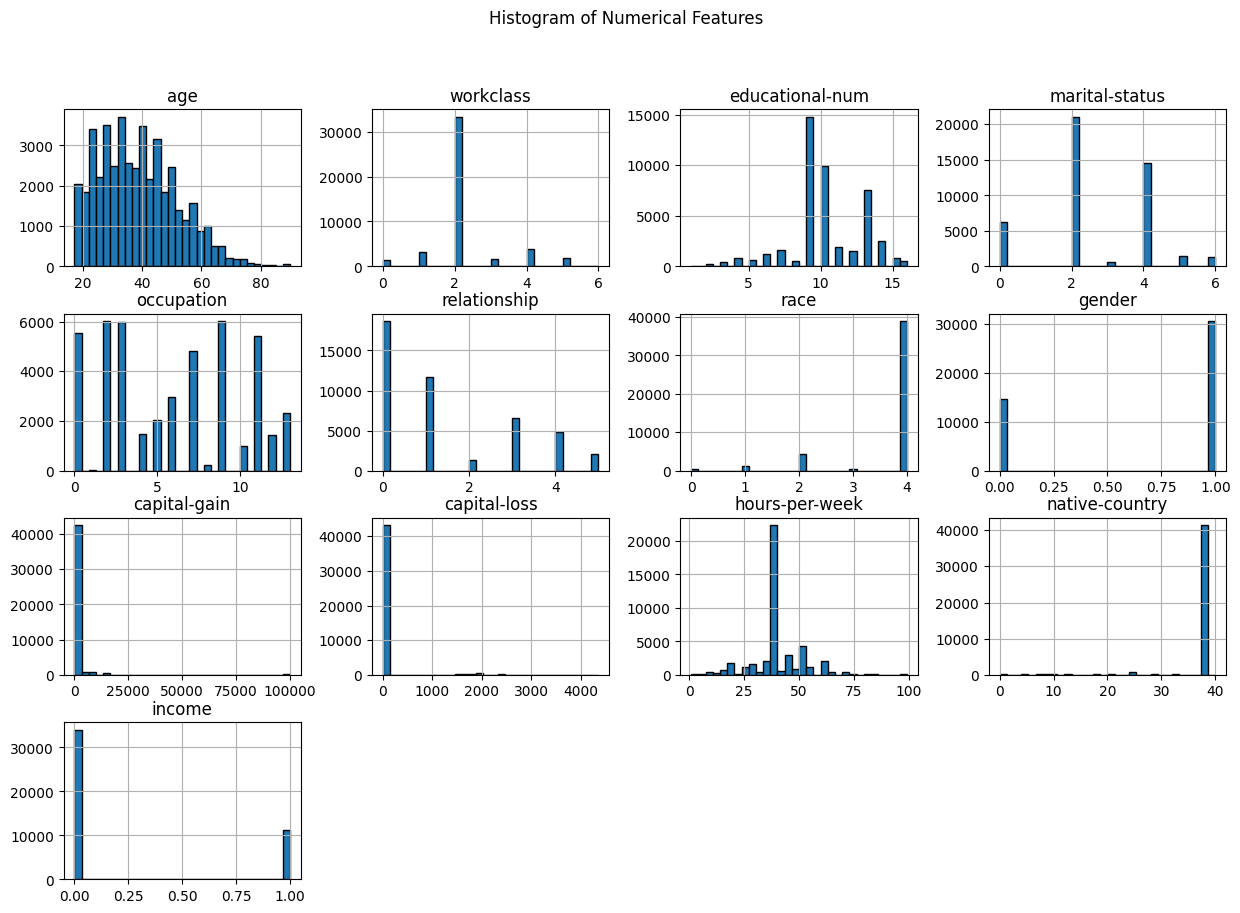

In [20]:
#histogram for numerical features
df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.show()


C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


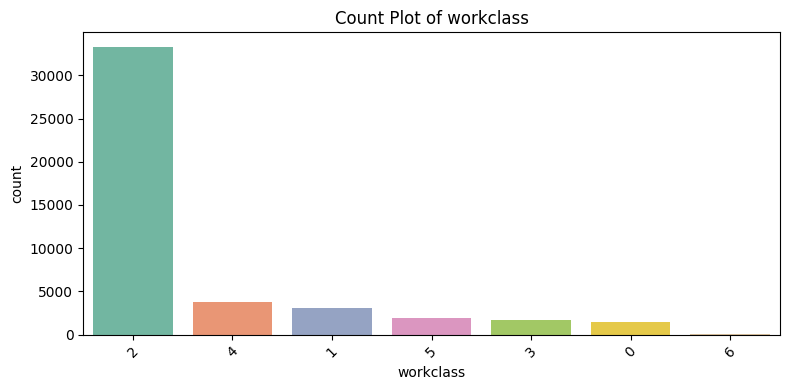

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


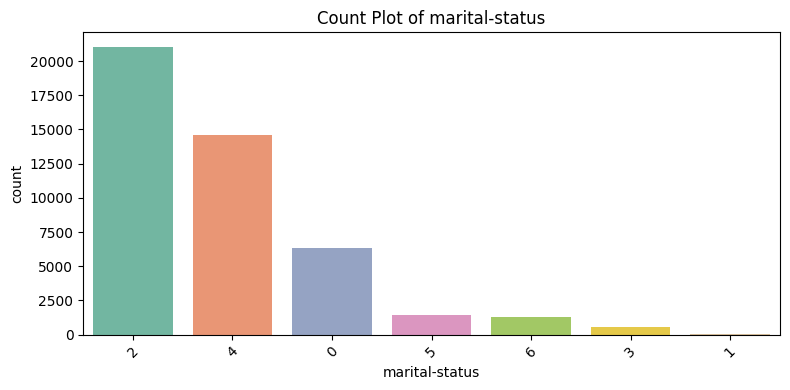

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


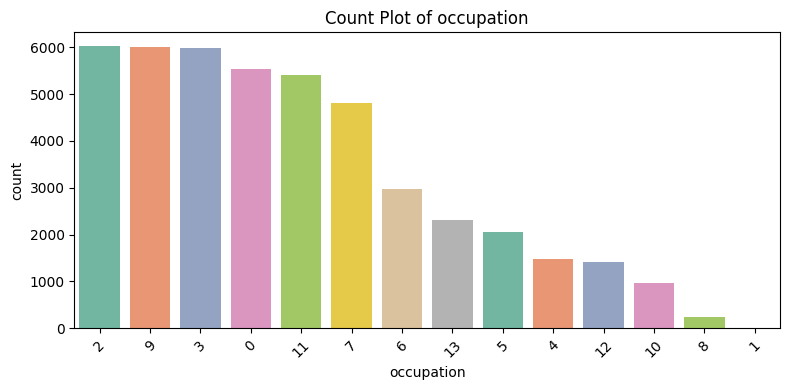

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


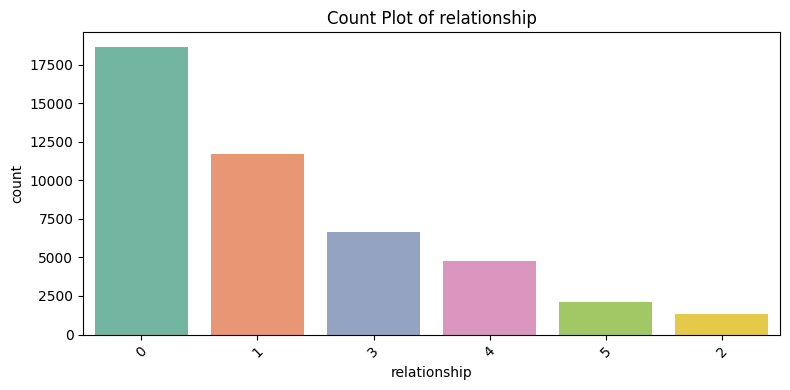

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


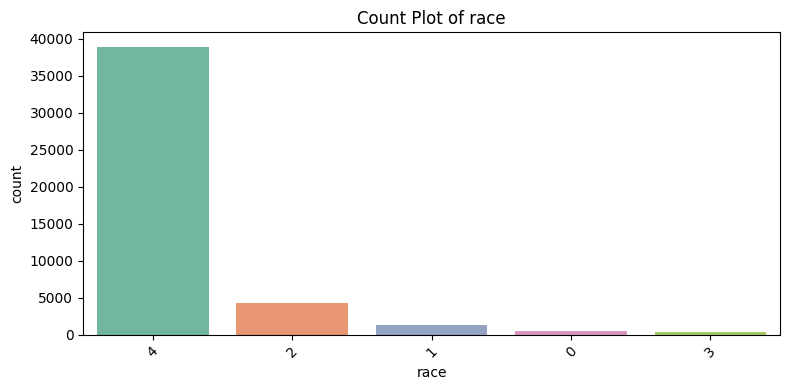

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


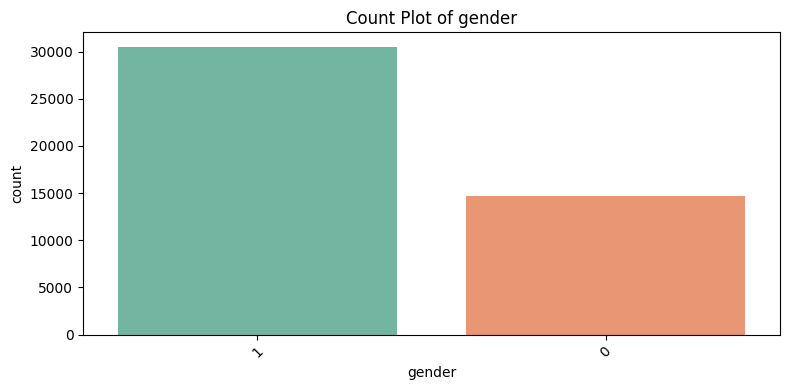

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\1356806337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


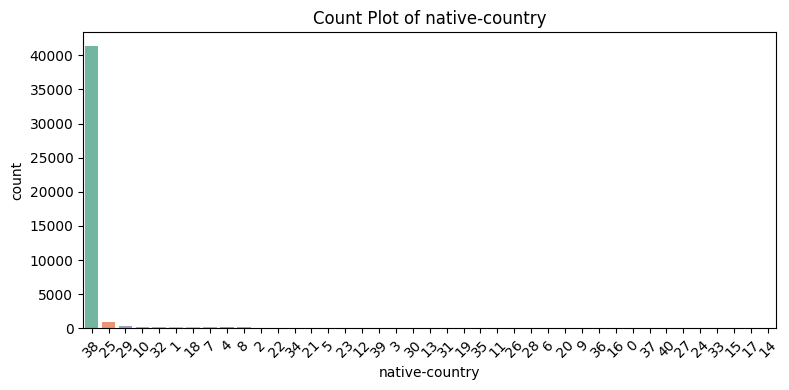

In [21]:
# Count plots for key categorical columns
cat_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Boxplots for numerical features by income

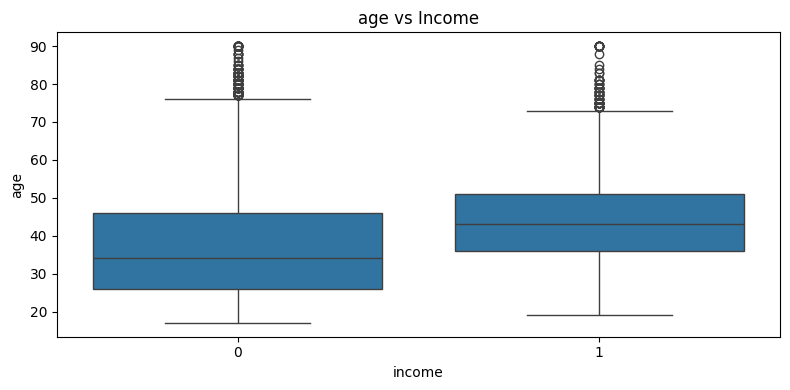

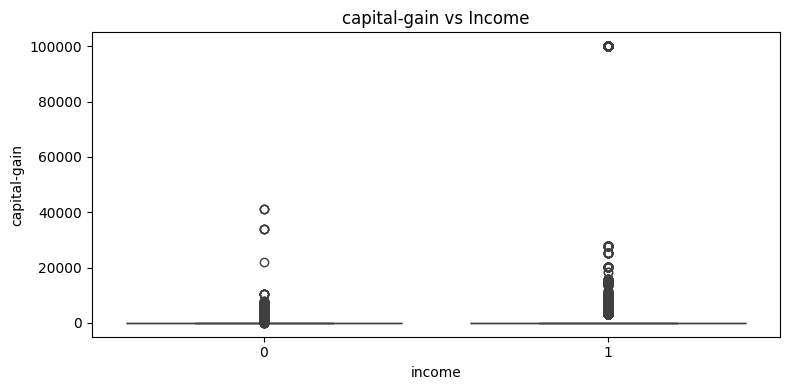

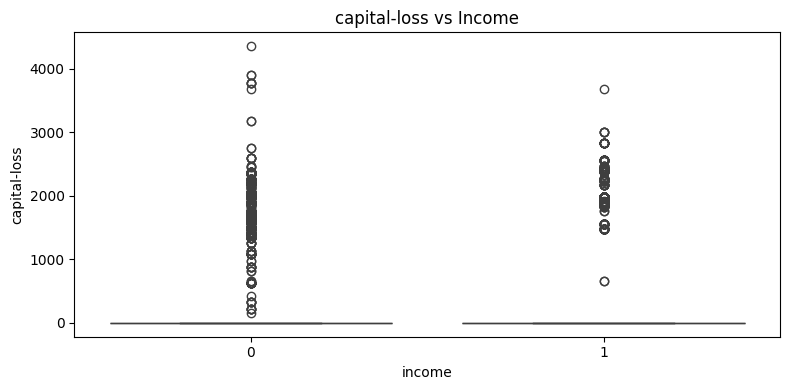

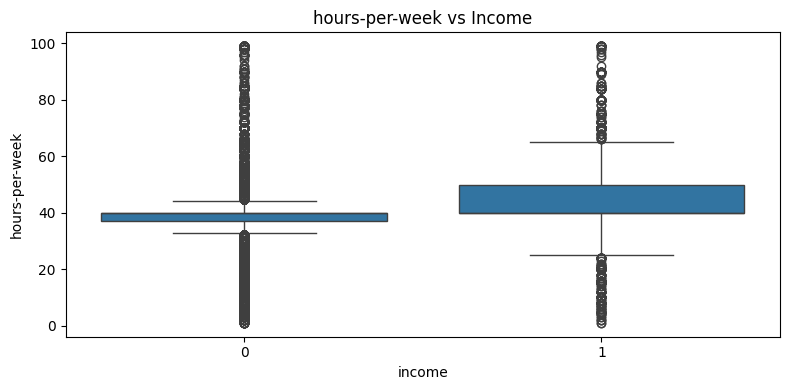

In [22]:
# Boxplots for numerical features by income
num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='income', y=col)
    plt.title(f'{col} vs Income')
    plt.tight_layout()
    plt.show()

 #### Correlation heatmap

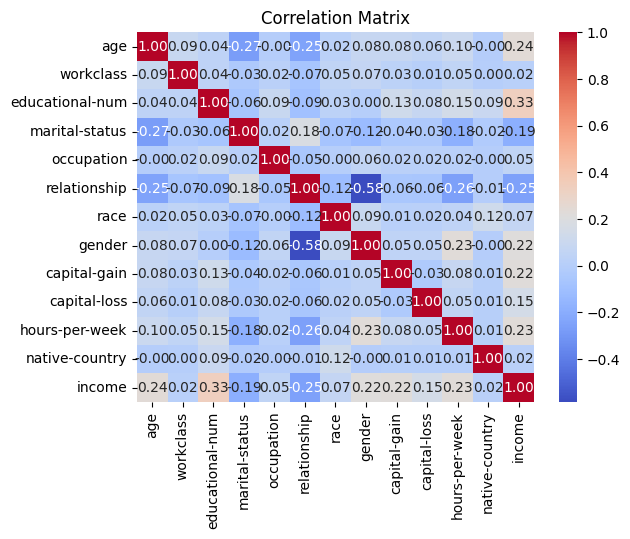

In [23]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### 3: Preprocess Dataset

In [12]:
df = df.replace('?', np.nan)
df.dropna(inplace=True)
df.drop(['fnlwgt', 'education'], axis=1, inplace=True)

### 4: Encode Categorical Columns
- Apply Label Encoding to all categorical features
- Encode target variable (`income`)

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.drop('income')

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

target_encoder = LabelEncoder()
df['income'] = target_encoder.fit_transform(df['income']) 

### 5: Train-Test Split

In [15]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6: Feature Scaling

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7: Model Training

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 8: Model Evaluation

In [24]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8485351022664456
[[6317  525]
 [ 845 1358]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6842
           1       0.72      0.62      0.66      2203

    accuracy                           0.85      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.85      0.84      9045



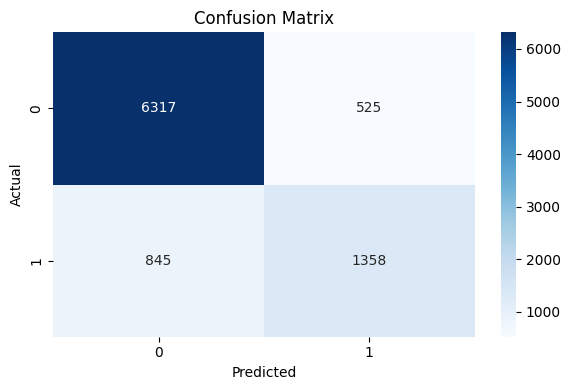

In [25]:
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### 10: Sample Prediction

In [26]:
sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample)
print("Predicted Income Class:", target_encoder.inverse_transform(predicted_class))

Predicted Income Class: ['<=50K']


#### 10.1 Compare Original vs Predicted

C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\3083446898.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actual_numeric, label='Actual', shade=True)
C:\Users\saiva\AppData\Local\Temp\ipykernel_13944\3083446898.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predicted_numeric, label='Predicted', shade=True)


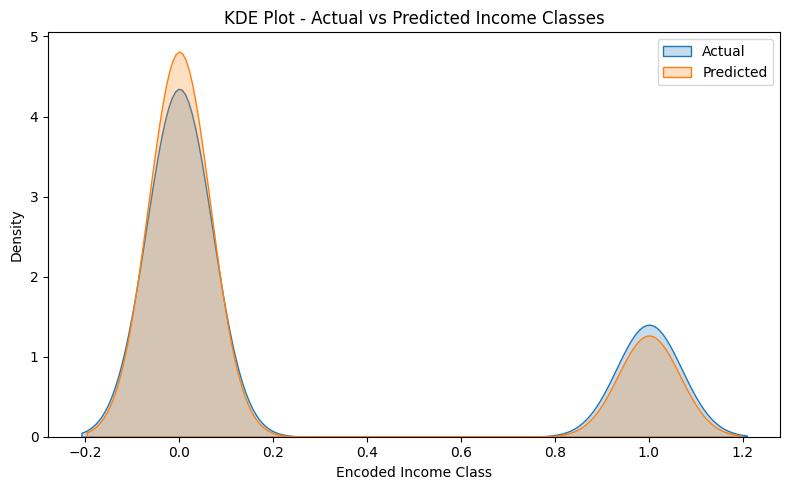

In [29]:
# Only transform if values are still string labels
if y_test.dtype == 'object' or isinstance(y_test.iloc[0], str):
    actual_numeric = pd.Series(target_encoder.transform(y_test))
    predicted_numeric = pd.Series(target_encoder.transform(y_pred))
else:
    actual_numeric = y_test
    predicted_numeric = y_pred

plt.figure(figsize=(8, 5))
sns.kdeplot(actual_numeric, label='Actual', shade=True)
sns.kdeplot(predicted_numeric, label='Predicted', shade=True)
plt.title('KDE Plot - Actual vs Predicted Income Classes')
plt.xlabel('Encoded Income Class')
plt.legend()
plt.tight_layout()
plt.show()


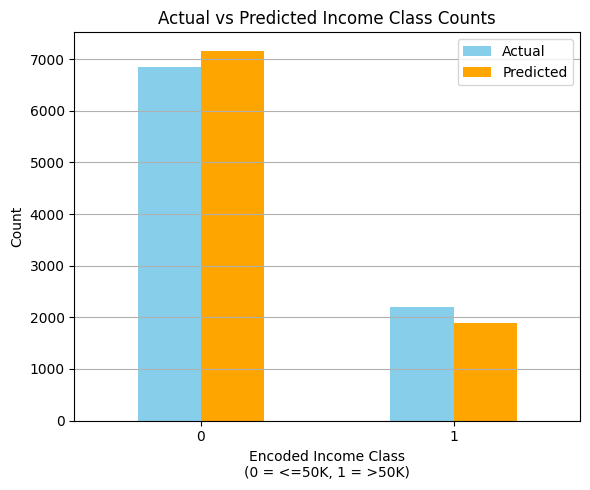

In [32]:
actual_series = pd.Series(actual_numeric)
predicted_series = pd.Series(predicted_numeric)

# Create count DataFrame
counts_df = pd.DataFrame({
    'Actual': actual_series.value_counts().sort_index(),
    'Predicted': predicted_series.value_counts().sort_index()
})

# Plot the comparison
counts_df.plot(kind='bar', figsize=(6, 5), color=['skyblue', 'orange'])
plt.title("Actual vs Predicted Income Class Counts")
plt.xlabel("Encoded Income Class\n(0 = <=50K, 1 = >50K)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()